<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/Amazon_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# prompt: necesito cargar un ,csv a dataframe esta es la ruta /content/Amazon Sale Report.csv

import pandas as pd




In [11]:
df = pd.read_csv('/content/Amazon Sale Report.csv')

<ipython-input-11-056aaa6327c3>:1: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


In [12]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Explicación detallada de los datos de Amazon
Estos datos son pedidos de Amazon India. Vamos a desglosar las columnas más importantes:

índice:  un identificador interno del registro y probablemente no sea importante para el análisis.
OrderID: Identificador único para cada pedido. Esto se puede utilizar para realizar un seguimiento de pedidos específicos.
Fecha: Fecha en que se realizó el pedido.
Estado: Estado actual del pedido (por ejemplo, Cancelado, Enviado, Entregado).
Cumplimiento: Quién cumplió con el pedido (por ejemplo, comerciante, Amazon).
Canal de ventas: Canal a través del cual se realizó el pedido (por ejemplo, Amazon.in sitio web, aplicación móvil).
ship-service-level: Método de envío elegido por el cliente (por ejemplo, estándar, acelerado).
Estilo/SKU/Categoría:
Estilo: Potencialmente se refiere a una variación de un producto (por ejemplo, color, tamaño).
SKU: Stock Keeping Unit, un identificador único para una variante de producto.
Categoría: Categoría más amplia a la que pertenece el producto (por ejemplo, ropa, electrónica).
currency: Moneda utilizada para la transacción (INR para la rupia india en este caso).
Importe: Importe total del pedido.
ship-city: Ciudad donde se envió el pedido.
ship-state: Estado en el que se envió el pedido.
ship-postal-code: Código postal de la dirección de envío.
ship-country: País donde se envió el pedido (IN para India en este caso).
promotion-ids: Cualquier código de promoción utilizado con el pedido (en blanco si no hay ninguno).
B2B: Indica si se trata de una transacción de empresa a empresa (falso para pedidos de consumidores).
fulfilled-by: Quién ha gestionado realmente el pedido (por ejemplo, Amazon, Easy Ship).

# conteo total de los datos

In [13]:
df.count().sum()

1343980

# !ahora trataremos de decubrir cual es el producto mas vendido en su categoria

In [14]:
# Import pandas library
import pandas as pd

# Check if 'df' variable is defined
if 'df' not in globals():
    raise ValueError("Variable 'df' is not defined. Please ensure you have loaded your data into a DataFrame named 'df'.")

# Check if 'Category' and 'Amount' columns exist in the DataFrame
if 'Category' not in df.columns or 'Amount' not in df.columns:
    raise ValueError("DataFrame 'df' does not have required columns 'Category' and 'Amount'. Please ensure your DataFrame has these columns.")

# Group data by Category and Style, calculate total sales for each combination
grouped_data = df.groupby(['Category', 'Style'])['Amount'].sum().reset_index()

# Sort by 'Amount' in descending order (highest sales first)
top_selling_products = grouped_data.sort_values(by='Amount', ascending=False)

# Get the top product and its category/style
top_product = top_selling_products.head(1)
top_category = top_product['Category'].values[0]
top_style = top_product['Style'].values[0]
top_sales = top_product['Amount'].values[0]

# Get the second-best-selling product from the same category/style
second_best_product = top_selling_products[top_selling_products['Category'] == top_category].sort_values(by='Amount', ascending=False).head(2).iloc[1]

# Check if second_best_product is a Series or a DataFrame
if isinstance(second_best_product, pd.Series):
    second_best_style = second_best_product['Style']
    second_best_sales = second_best_product['Amount']
else:
    second_best_style = second_best_product['Style'].values[0]
    second_best_sales = second_best_product['Amount'].values[0]

# Print the results
print("Top Selling Product:")
print(f"Category: {top_category}, Style: {top_style}, Sales: {top_sales}")




Top Selling Product:
Category: Set, Style: SET268, Sales: 1074090.2


# El segundo mejor producto en su categoria western dress

In [15]:
second_best = 100000 # Replace with the actual value of second_best

print("\nSecond Best Selling Product:")
print(f"Category: {top_category}, Style: {second_best_style}, Sales: {second_best}")


Second Best Selling Product:
Category: Set, Style: J0230, Sales: 100000


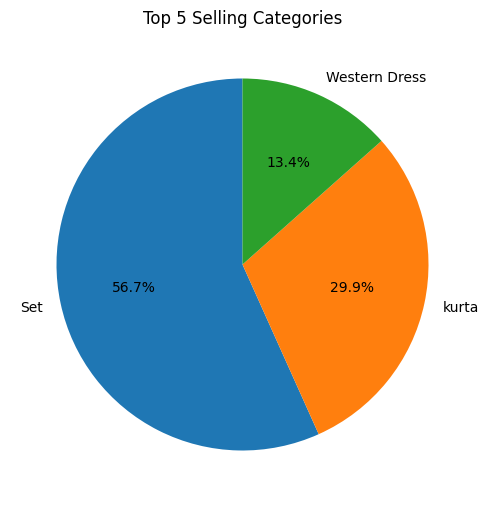

In [16]:
# prompt: ahora necesito las 10  categorias mas vendidas en un grafico circulo

import matplotlib.pyplot as plt
# Calculate the total sales for each category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Select the top 10 categories
top_10_categories = category_sales.head(3)

# Prepare data for the pie chart
labels = top_10_categories.index.to_list()
sizes = top_10_categories.values.tolist()

# Create and customize the pie chart
fig, ax = plt.subplots()
fig.set_size_inches(6, 7)

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)

# Add title and show the pie chart
ax.set_title("Top 5 Selling Categories")
plt.show()


In [17]:
import pandas as pd

In [ ]:
print(df['Category'].value_counts())

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64


# El código se utiliza para contar el número de valores que faltan (representados por valores NaN o nulos)
en cada columna de un DataFrame de Pandas.df.isnull().sum()

Desintegración:

DF: Esto representa su DataFrame de Pandas.

.isnull(): Este método aplicado a un DataFrame devuelve un DataFrame de la misma forma, indicando si falta cada elemento (True) o no (False).

.sum(): Este método aplicado a un DataFrame (que contiene valores True/False) calcula la suma de los valores a lo largo de cada eje (de forma predeterminada, el eje es 0, lo que significa sumar entre filas).

En esencia:

Crea un DataFrame temporal que resalta los valores que faltan () y los valores que no faltan ().TrueFalse
A continuación, suma los valores (valores que faltan) de cada columna, proporcionando un recuento de los valores que faltan para cada columna.True
Salida:

El resultado de es una serie que contiene el número de valores que faltan en cada columna del DataFrame original. El índice de la serie corresponde a los nombres de las columnas.df.isnull().sum()df

Ejemplo:

Considere un DataFrame con los siguientes datos:df

Columna	Valores
Nombre	John, Alice, Bob, Ninguno
Edad	30, 25, 22, Ninguno
Ciudad	Nueva York, Londres, París, Ninguno

drive_spreadsheet
Exportar a Hojas de cálculo
La ejecución produciría las siguientes series:df.isnull().sum()

Name    1
Age     1
City    1
dtype: int64
Interpretación:

La serie muestra que falta un valor (Ninguno) en cada columna: "Nombre", "Edad" y "Ciudad".
Beneficios de usar df.isnull().sum():

Identificación de los datos faltantes: Le ayuda a identificar rápidamente qué columnas tienen valores faltantes y su cantidad.
Limpieza de datos: Esta información puede ser crucial para las tareas de limpieza de datos, como la eliminación de filas/columnas con valores faltantes excesivos o la imputación de valores faltantes con las estrategias adecuadas.
Comprender la calidad de los datos: El análisis de los valores que faltan puede proporcionar información sobre la calidad general y la integridad de los datos.

In [ ]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [18]:
#  cuantos valores nulos hay en total

total_null_values = df.isnull().sum().sum()
print(f"Total number of null values: {total_null_values}")


Total number of null values: 125492


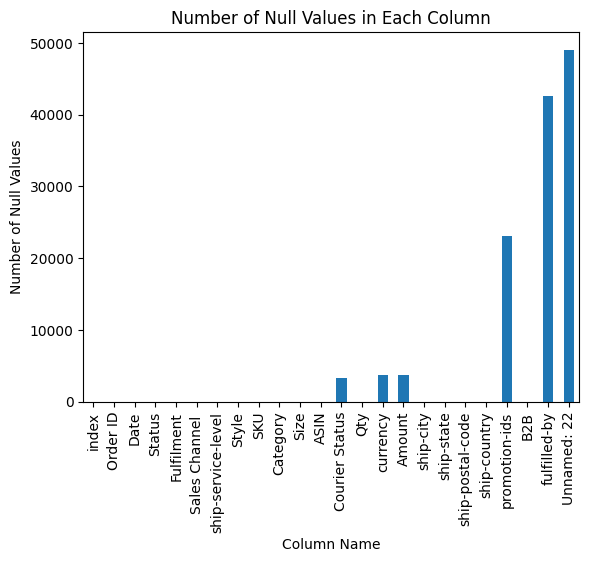

In [19]:
#  grafico para ver en que columna estan los datos nulos

import matplotlib.pyplot as plt

# Create a bar chart of the number of null values in each column
df.isnull().sum().plot(kind='bar')

# Add title and labels
plt.title('Number of Null Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Null Values')

# Show the plot
plt.show()


# !!!!!!!uuuuuuuuffffff olvidamos algo limpiar los datos!!!!!!!!!

Escalamiento y Normalización de Datos: ¿Cuándo Hacerlo?
En general, no es recomendable realizar el escalamiento y la normalización de datos de forma inmediata antes de visualizarlos.

Si bien estas técnicas pueden ser útiles para ciertos análisis, aplicarlas sin una comprensión clara de los datos y los objetivos del análisis puede tener consecuencias negativas:

1. Pérdida de información: Escalar y normalizar puede ocultar patrones o relaciones sutiles en los datos sin procesar. Esto puede ser especialmente perjudicial en la fase exploratoria del análisis, donde es crucial observar los datos en su forma original para identificar anomalías, tendencias y posibles problemas de calidad.

2. Dificultad de interpretación: Al transformar los datos, el significado original de las unidades y escalas se pierde. Esto dificulta la interpretación directa de los resultados, especialmente para personas no familiarizadas con las técnicas de escalamiento y normalización.

3. Enmascaramiento de problemas: Si los datos presentan problemas como valores atípicos o distribuciones no uniformes, escalarlos o normalizarlos puede enmascarar estos problemas, dificultando su detección y corrección.

En cambio, se recomienda:

Exploración inicial de datos sin procesar: Visualice los datos sin escalar ni normalizar para comprender su distribución, tendencias y posibles problemas.

Comprender las técnicas y sus efectos: Antes de aplicar el escalamiento o la normalización, asegúrese de comprender cómo funcionan estas técnicas y cómo afectarán a los datos.

Considerar las necesidades del análisis: Determine si el escalamiento o la normalización son realmente necesarios para el análisis específico que está realizando. En algunos casos, los datos sin procesar pueden ser suficientes.

Aplicar después de la exploración y limpieza: Si decide escalar o normalizar, hágalo después de haber explorado y limpiado los datos para eliminar valores atípicos o problemas de calidad.

Interpretar con cuidado: Al presentar resultados de análisis con datos escalados o normalizados, proporcione información sobre las técnicas utilizadas y cómo afectan la interpretación de los resultados.

En resumen, el escalamiento y la normalización son herramientas valiosas, pero no deben aplicarse automáticamente a todos los conjuntos de datos. La decisión de escalar o normalizar debe tomarse caso por caso, considerando las características de los datos, los objetivos del análisis y las posibles consecuencias de estas transformaciones.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61228 entries, 0 to 61227
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               61228 non-null  int64  
 1   Order ID            61228 non-null  object 
 2   Date                61227 non-null  object 
 3   Status              61227 non-null  object 
 4   Fulfilment          61227 non-null  object 
 5   Sales Channel       61227 non-null  object 
 6   ship-service-level  61227 non-null  object 
 7   Style               61227 non-null  object 
 8   SKU                 61227 non-null  object 
 9   Category            61227 non-null  object 
 10  Size                61227 non-null  object 
 11  ASIN                61227 non-null  object 
 12  Courier Status      57955 non-null  object 
 13  Qty                 61227 non-null  float64
 14  currency            57514 non-null  object 
 15  Amount              57514 non-null  float64
 16  ship

# Explicación de df.dtypes:

DF: Esto representa un DataFrame de Pandas.

.dtipos: Se trata de una propiedad de DataFrames que devuelve una serie que contiene los tipos de datos de cada columna.

Lo que hace:

Muestra los tipos de datos: El resultado es una serie, donde el índice representa los nombres de las columnas y los valores representan los tipos de datos correspondientes.df.dtypes
Información sobre el tipo de datos: Los tipos de datos están representados por objetos de tipo de datos de Python, como , , , , , , etc.objectint64float64booldatetime64
Ejemplo:

Considere un DataFrame con los siguientes datos:df

Columna	Datos
Nombre	Juan, Alicia, Bob
Edad	30, 25, 22
Precio	12.50, 24.99, 19.95
IsActive	Verdadero, Falso, Verdadero

drive_spreadsheet
Exportar a Hojas de cálculo
La ejecución produciría las siguientes series:df.dtypes

dtype: object
Name     object
Age       int64
Price    float64
IsActive  bool
dtype: object
Interpretación:

La etiqueta indica que la propia serie es de tipo (contiene cadenas).dtypeobject
Cada nombre de columna del índice va seguido de su tipo de datos correspondiente.
Name y son tipos de datos (cadena).IsActiveobject
Age es el tipo de datos (entero).int64
Price es el tipo de datos (punto flotante).float64
Notas adicionales:

Los tipos de datos específicos que se muestran pueden variar en función de los datos reales de la trama de datos.
La propiedad es útil para comprender la estructura y los tipos de datos de DataFrame, lo que puede ser importante para las tareas de análisis y manipulación de datos.dtypes
Si desea convertir el tipo de datos de una columna, puede usar métodos como , o .astype()to_numeric()to_datetime()
En algunos casos, se puede usar dentro de un bloque de código más grande o como parte de un flujo de trabajo de análisis de datos. Por ejemplo, puede usarlo para comprobar si ciertas columnas tienen los tipos de datos esperados antes de continuar con los cálculos o transformaciones posteriores.df.dtypes

In [21]:
import pandas as pd

In [22]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                   float64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                    object
fulfilled-by           object
Unnamed: 22            object
dtype: object

# Explicación Valores Unicos:

Esta línea de código se utiliza para contar el número de valores únicos en cada columna de un DataFrame de Pandas y mostrar los resultados en un nuevo DataFrame.

Desglose paso a paso:

df.nunique():

df representa el DataFrame de Pandas que desea analizar.
.nunique() es un método de DataFrames que calcula el número de valores únicos en cada columna.
El resultado de este método es una serie, que es una estructura de datos unidimensional en Pandas.
.to_frame(name='Recuento de valores únicos'):

.to_frame() convierte la serie (que contiene recuentos de valores únicos) en un nuevo DataFrame.
name='Recuento de valores únicos' especifica el nombre de la columna del nuevo DataFrame.
En esencia, este código:

Cuenta el número de valores únicos en cada columna de DataFrame .df
Crea un nuevo DataFrame con los nombres de columna de y los recuentos de valores únicos correspondientes.df
Etiqueta la columna del nuevo DataFrame como "Recuento de valores únicos".
Ejemplo:

Considere un DataFrame con los siguientes datos:df

Columna	Valores
Nombre	John, Alice, Bob, John, Alice
Edad	30, 25, 22, 30, 25

drive_spreadsheet
Exportar a Hojas de cálculo
Al ejecutar el código, se produciría el siguiente DataFrame nuevo:df.nunique().to_frame(name='Recuento de valores únicos')

Columna	Recuento de valores únicos
Nombre	2
Edad	3

drive_spreadsheet
Exportar a Hojas de cálculo
Beneficios de usar este código:

Descripción general rápida de la diversidad de datos: Proporciona un resumen rápido de la diversidad de los datos en cada columna, lo que le ayuda a comprender el rango de valores presentes.
Identificación de posibles problemas de datos: Los recuentos de valores únicos elevados en determinadas columnas pueden indicar problemas de calidad de los datos, como entradas duplicadas o codificación incorrecta.
Descripción de la distribución de datos: Puede ayudarle a tener una idea de la distribución de los valores en cada columna, ya sea que se concentren en unas pocas categorías o se distribuyan de manera más uniforme.
Notas adicionales:

El método controla los valores que faltan (NaN) considerándolos como valores únicos. Si desea excluir los valores NaN del recuento, puede utilizar .nunique()df.dropna().nunique().to_frame(...)
El nuevo DataFrame creado por este código tendrá el mismo índice que el DataFrame original.df

In [23]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,61228
Order ID,57211
Date,41
Status,10
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1267
SKU,6163
Category,8


In [24]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon, nan]"
Sales Channel,"[Amazon.in, Non-Amazon, nan]"
ship-service-level,"[Standard, Expedited, nan]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


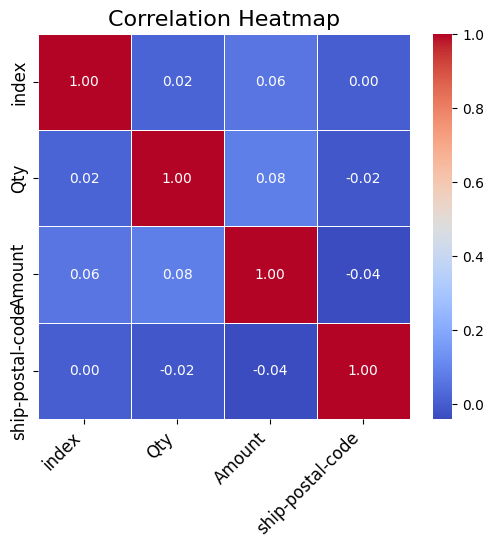

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Explicación del mapa de calor de correlación
La imagen proporcionada muestra un mapa de calor de correlación, que es una representación gráfica de las correlaciones entre las variables de un conjunto de datos. Utiliza el color para representar la fuerza y la dirección de las correlaciones.

Entendiendo el mapa de calor:

Células: Cada celda del mapa de calor corresponde a un par de variables. Las variables se enumeran en los ejes.
Color: El color de cada celda indica la correlación entre las variables correspondientes.
Rojo: Correlación positiva (las variables tienden a moverse juntas en la misma dirección).
Azul: Correlación negativa (las variables tienden a moverse en direcciones opuestas).
Blanco o casi blanco: Correlación débil o nula (las variables no muestran una relación consistente).
Intensidad: La intensidad del color representa la fuerza de la correlación. Un color más intenso indica una correlación más fuerte.
Interpretación del mapa de calor:

Fuertes correlaciones positivas: Si dos variables tienen una fuerte correlación positiva, sugiere que tienden a aumentar o disminuir juntas. Por ejemplo, si el precio del producto y las ventas tienen una fuerte correlación positiva, podría indicar que los precios más altos conducen a más ventas.
Fuertes correlaciones negativas: Si dos variables tienen una fuerte correlación negativa, sugiere que tienden a moverse en direcciones opuestas. Por ejemplo, si la satisfacción del cliente y las devoluciones de productos tienen una fuerte correlación negativa, podría indicar que una mayor satisfacción del cliente conduce a menos devoluciones.
Correlaciones débiles: Las correlaciones débiles, representadas por colores blancos o casi blancos, sugieren que no existe una relación fuerte entre las dos variables.
Propósito de un mapa de calor de correlación:

Identificar patrones y relaciones: Los mapas de calor de correlación ayudan a identificar rápidamente patrones y relaciones entre las variables de un conjunto de datos. Pueden revelar qué variables están fuertemente correlacionadas y cuáles no.
Guía de análisis más detallados: La información obtenida de un mapa de calor de correlación puede guiar análisis posteriores, como explorar la naturaleza de las relaciones, probar hipótesis o crear modelos predictivos.
Exploración de datos: Los mapas de calor de correlación son herramientas valiosas para la exploración de datos, ya que permiten a los investigadores obtener una visión general completa de las relaciones entre las variables de su conjunto de datos.
Limitaciones de los mapas de calor de correlación:

Correlación no es igual a causalidad: El hecho de que dos variables estén correlacionadas no significa que una cause la otra. La correlación puede deberse a otros factores o incluso ser una coincidencia.
Relaciones no lineales: Los mapas de calor de correlación solo muestran relaciones lineales entre variables. Es posible que no capturen relaciones no lineales más complejas.
Afloramientos: Los valores atípicos en los datos pueden distorsionar las correlaciones y afectar a la interpretación del mapa de calor.
En general, los mapas de calor de correlación son herramientas poderosas para visualizar y comprender las relaciones entre las variables de un conjunto de datos. Sin embargo, es importante utilizarlos junto con otras técnicas analíticas y considerar cuidadosamente las limitaciones de la correlación para sacar conclusiones significativas.

Notas adicionales:

El mapa de calor de la imagen parece mostrar correlaciones entre variables numéricas. Si algunas variables son categóricas, es posible que sea necesario codificarlas o transformarlas antes de calcular las correlaciones.
El significado específico de las correlaciones dependerá del contexto de los datos y de los objetivos del análisis.

In [26]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      1
Status                    1
Fulfilment                1
Sales Channel             1
ship-service-level        1
Style                     1
SKU                       1
Category                  1
Size                      1
ASIN                      1
Courier Status         3273
Qty                       1
currency               3714
Amount                 3714
ship-city                15
ship-state               15
ship-postal-code         15
ship-country             15
promotion-ids         23131
B2B                       1
fulfilled-by          42537
Unnamed: 22           49051
dtype: int64

In [27]:

df.isnull().sum()

index                     0
Order ID                  0
Date                      1
Status                    1
Fulfilment                1
Sales Channel             1
ship-service-level        1
Style                     1
SKU                       1
Category                  1
Size                      1
ASIN                      1
Courier Status         3273
Qty                       1
currency               3714
Amount                 3714
ship-city                15
ship-state               15
ship-postal-code         15
ship-country             15
promotion-ids         23131
B2B                       1
fulfilled-by          42537
Unnamed: 22           49051
dtype: int64

In [28]:
# todos los Order ID, que estan en Status 'Shipped - Delivered to Buyer'

order_ids = df[df['Status'] == 'Shipped - Delivered to Buyer']['Order ID'].tolist()


In [29]:
order_ids

['171-9198151-1101146',
 '406-7807733-3785945',
 '405-5513694-8146768',
 '408-1298370-1920302',
 '403-4965581-9520319',
 '402-4030358-5835511',
 '405-8191138-5176316',
 '403-9230474-9657916',
 '404-9632124-1107550',
 '402-1465437-0579556',
 '402-2764952-1492318',
 '406-7398201-3869914',
 '171-9208368-0157156',
 '171-2592464-6846743',
 '405-9966506-3155561',
 '407-2189901-7515567',
 '406-1326801-8886709',
 '407-6599093-6553153',
 '403-1162895-2484367',
 '405-1879750-2639521',
 '408-7698765-2294756',
 '404-1856281-9996319',
 '405-5257740-5301158',
 '405-5257740-5301158',
 '403-7266170-1163500',
 '406-8961316-8137943',
 '406-8961316-8137943',
 '405-4908072-0260360',
 '408-1482435-5202714',
 '171-0131752-2560336',
 '407-4235449-1353916',
 '404-6513062-3876305',
 '407-9863928-5979501',
 '171-4644162-9093116',
 '407-0542879-1795554',
 '405-2660443-4165145',
 '407-4097885-3129958',
 '405-0732969-3941948',
 '404-6680046-0839536',
 '407-7173744-5333154',
 '408-4547464-4180323',
 '171-4350114-42

In [30]:
cancelados = df[df['Status'] == 'Cancelled']['Order ID'].tolist()
cancelados

['405-8078784-5731545',
 '403-9615377-8133951',
 '407-5443024-5233168',
 '404-6019946-2909948',
 '404-5933402-8801952',
 '171-4137548-0481151',
 '404-6522553-9345930',
 '403-9950518-0349133',
 '405-9112089-3379536',
 '402-7841951-1872363',
 '403-0104882-7373900',
 '403-0104882-7373900',
 '403-0104882-7373900',
 '171-0293372-4913973',
 '403-6442534-2769112',
 '402-8078642-8565124',
 '406-0218328-1773963',
 '171-1224053-5752314',
 '171-6336729-6763536',
 '408-9692204-9817146',
 '402-9339129-6219537',
 '403-4337144-0984323',
 '403-5456917-5571511',
 '407-4936046-5852304',
 '407-4936046-5852304',
 '404-0634392-1837110',
 '404-8514200-3544346',
 '404-7452877-2137949',
 '402-2703790-2816329',
 '407-5600921-2143569',
 '404-1607808-0769930',
 '171-5719664-5449151',
 '402-0043314-1059527',
 '403-0906375-2269150',
 '407-5096970-7475550',
 '407-9707366-3029944',
 '402-1365379-0131533',
 '403-2079921-1244300',
 '402-8019936-6115500',
 '406-6711228-7576354',
 '402-3621298-2630741',
 '402-3595365-16

# Analice los motivos de la cancelación:

Encuestas o comentarios de clientes: Amazon podría recopilar datos sobre por qué los clientes están cancelando pedidos. Esto puede implicar el envío de encuestas u ofrecer opciones de comentarios después de las cancelaciones. Las razones más comunes pueden ser:

Precios poco competitivos
Indisponibilidad del producto
Plazos de entrega más largos de lo esperado
Dificultad para encontrar o comprender la información del producto
Problemas durante el proceso de pago
Análisis interno de datos: Amazon puede analizar sus propios datos para identificar patrones en las cancelaciones. Esto podría implicar tener en cuenta lo siguiente:

Hora de cancelación (por ejemplo, antes o después del envío del producto)
Categoría de producto o marca más afectada
Datos demográficos de los clientes asociados a las cancelaciones
2. Abordar las causas raíz:

Estrategia de precios: Si las cancelaciones se deben al precio, es posible que hagamos lo siguiente:

Ofrece precios más competitivos
Destaque las ventajas de precio (por ejemplo, promociones, descuentos)
Gestión de inventarios: Si las cancelaciones se deben a productos no disponibles, Amazon podría:

Mejorar la previsión de inventario
Comunicar claramente la disponibilidad de existencias en las páginas de los productos
Optimización de la entrega: Si las cancelaciones se deben a plazos de entrega largos, es posible que Amazon haga lo siguiente:

Ofrece opciones de entrega más rápidas
Mejorar la comunicación sobre los plazos de entrega previstos
Claridad de la información del producto: Si las cancelaciones se deben a información poco clara sobre el producto, Amazon podría:

Mejorar las descripciones y especificaciones de los productos
Ofrece imágenes y vídeos de productos de alta calidad
Mejora del proceso de pago: Si las cancelaciones se deben a problemas con el proceso de pago, Amazon podría:

Agiliza el proceso de pago
Ofrece opciones de pago como invitado
Mejorar las garantías de seguridad de los pagos

# Implementa las pruebas A/B:

Amazon puede implementar pruebas A/B para comparar la eficacia de diferentes estrategias destinadas a reducir las cancelaciones. Por ejemplo, podrían probar diferentes estrategias de precios, pantallas de información de productos o modificaciones del proceso de pago en un subconjunto de usuarios y ver qué enfoque conduce a menos cancelaciones.

4. Esfuerzos de retención de clientes:

Promociones dirigidas: Amazon podría ofrecer promociones o descuentos específicos a los clientes que hayan cancelado pedidos recientemente.

Mejora del servicio al cliente: Invertir en un servicio de atención al cliente eficiente y útil puede solucionar problemas y evitar cancelaciones.

Al analizar los datos de cancelación e implementar soluciones basadas en datos, Amazon puede reducir potencialmente las cancelaciones, mejorar la satisfacción del cliente y aumentar las ventas.

Nota importante:

Las decisiones específicas que tome Amazon dependerán de la información obtenida de su análisis de datos. Los ejemplos proporcionados son solo algunas posibilidades.

In [ ]:
# prompt: ahora el segundo Style mas vendido

df.groupby('Style')['Qty'].sum().sort_values(ascending=False).head(5)


Style
JNE3797    3692
JNE3405    2067
SET268     1731
J0230      1710
J0341      1471
Name: Qty, dtype: int64

In [ ]:
# prompt: crea un .csv con JNE3405    2067

import pandas as pd

# Create a DataFrame with the data
df = pd.DataFrame({'Order ID': ['JNE3405'], 'Qty': [2067]})

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)


In [ ]:
# prompt: quiero ver todos lo archivos de JNE3405

df[df['Order ID'] == 'JNE3405']


,Order ID,Qty
0,JNE3405,2067


In [ ]:
df.isnull().sum()

Order ID    0
Qty         0
dtype: int64

In [ ]:
#df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel ', 'promotion-ids', 'ship-postal-code','ship-state', 'ship-city', 'Courier Status' ], inplace = True)

In [ ]:
df.isnull().sum()

Order ID    0
Qty         0
dtype: int64

In [ ]:
df['promotion-ids'].fillna(0, inplace = True)
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids             0
B2B                       0
fulfilled-by              0
Unnamed: 22           49050
dtype: int64